# Praca Domowa 4 - Michał Mazuryk

## Zadanie 1

In [93]:
import pandas as pd
# import danych
df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

In [94]:
#a
df.loc[(df.Publisher == "Nintendo") & (df.Year > 2015) & (df.EU_Sales > df.NA_Sales)].reset_index()
#odp: Mario & Sonic at the Rio 2016 Olympic Games (3DS, WiiU), Teddy Together

,index,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,4199,4263,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
1,6477,6590,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016.0,Action,Nintendo,0.03,0.11,0.10,0.01,0.26
2,14703,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


In [95]:
#b
df.loc[(df.Year == 2010)].groupby("Genre").Global_Sales.agg("sum").reset_index().sort_values("Global_Sales",ascending = [False]).head(1)
#odp: action

,Genre,Global_Sales
0,Action,117.64


In [96]:
#c
tab = df.groupby("Genre").agg("mean").sort_values("JP_Sales")
tab = tab.loc[(tab.JP_Sales > tab.EU_Sales)].JP_Sales.to_frame().reset_index()
tab = tab.rename(columns={"Genre":"Typ Gry","JP_Sales":"Średnia sprzedaż w Japonii"})
tab

,Typ Gry,Średnia sprzedaż w Japonii
0,Strategy,0.073284
1,Puzzle,0.099439
2,Role-Playing,0.238293


## Zadanie 2

In [97]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Oryginalny wykres

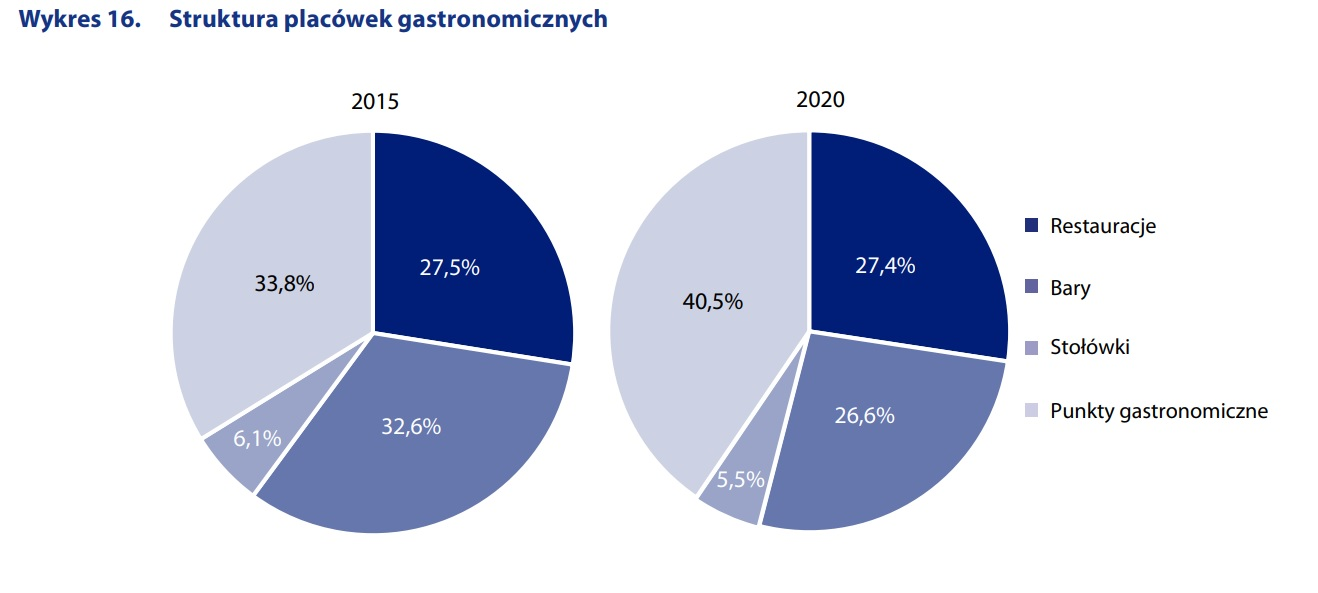

In [11]:
# https://stat.gov.pl/obszary-tematyczne/ceny-handel/handel/rynek-wewnetrzny-w-2020-roku,7,27.html
Image(filename = 'gastr.jpg')

### Wykres z pd2

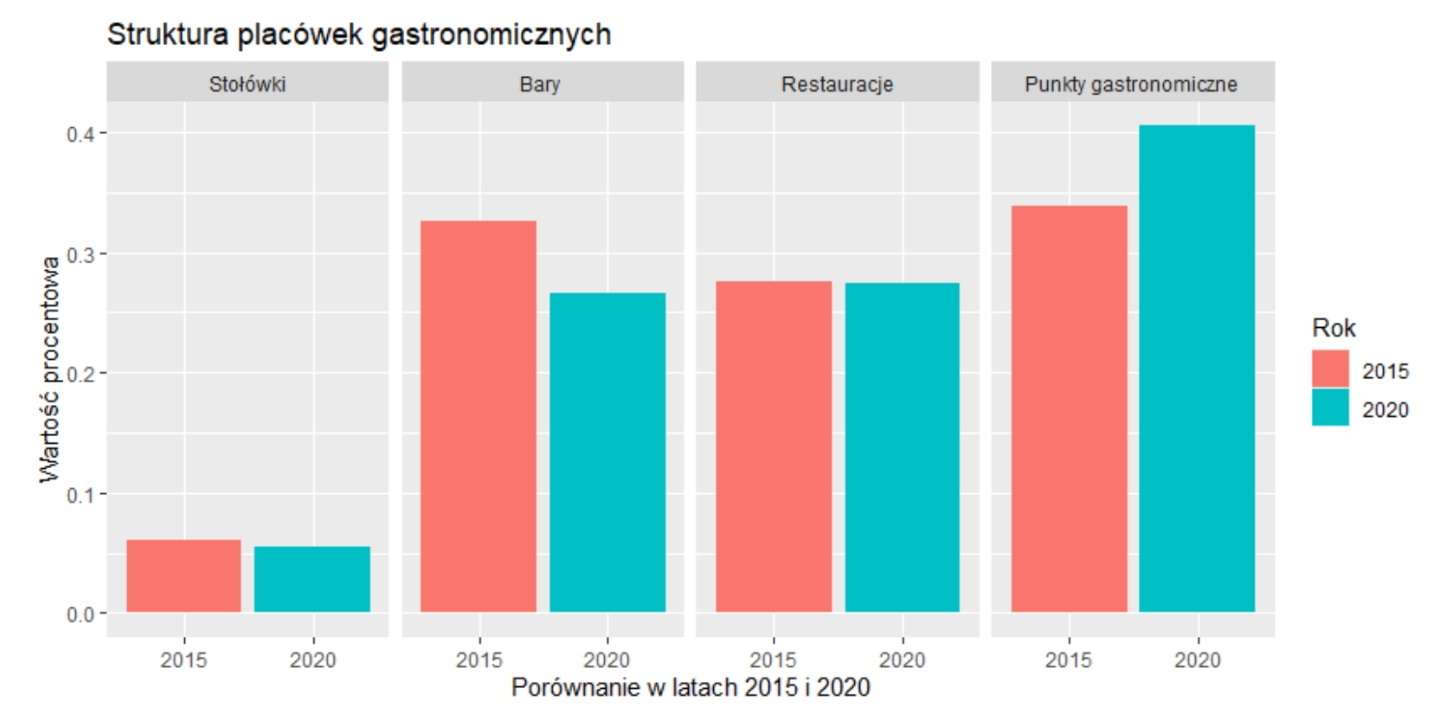

In [12]:
# https://github.com/mini-pw/2022Z-DataVisualizationTechniques/blob/main/homeworks/hw2/KosiukWojciech/RaportPD2.pdf
Image(filename = 'wykres.jpg')

### Kod i wykres:

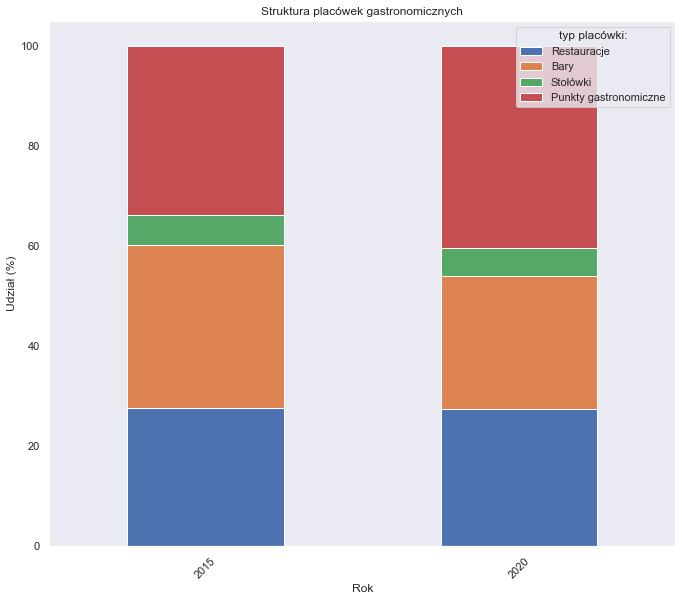

In [98]:
dane = pd.DataFrame({
    'Restauracje':[27.5,27.4],
    'Bary':[32.6,26.6],
    'Stołówki':[6.1,5.5],
    'Punkty gastronomiczne':[33.8,40.5]
    }, index=['2015','2020'])

sns.set(rc = {'figure.figsize': (10,9)})
sns.set_style("dark")
pd.options.display.max_rows = 10
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 60)

dane.plot(kind="bar", stacked = True).legend( loc='upper right', ncol=1, title="typ placówki:")
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Struktura placówek gastronomicznych")
plt.xlabel("Rok")
plt.ylabel("Udział (%)")
plt.show()

### Uzasadnienie

Wykres w pythonie jest lepszy, ponieważ pozostawia strukturę, w której cały słupek to 100%. Dzięki temu widzimy zależności między typami placówek w poszczególnym roku, jednocześnie mogąc porównać jak się zmieniły w 5 lat później. Wykres jest również bardziej spójny kolorystycznie, bez dodatków rozpraszających naszą uwagę.